In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle

In [3]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

In [19]:
out[2]

{'False': {'False': {'normal': {0.0: {0: {},
     1: {},
     2: {},
     3: {},
     4: {},
     5: {},
     6: {},
     7: {},
     8: {},
     9: {}},
    6.0: {0: {0: {'Iterations': 1300,
       'Lambda': 0,
       'Learning Rate': 1,
       'Least Train Error': 21.38481850899583,
       'Num home factors': 4,
       'Num season factors': 3},
      1: {'Iterations': 100,
       'Lambda': 0,
       'Learning Rate': 1,
       'Least Train Error': 7.882055654185739,
       'Num home factors': 4,
       'Num season factors': 3},
      2: {'Iterations': 700,
       'Lambda': 0,
       'Learning Rate': 0.1,
       'Least Train Error': 8.830775844362565,
       'Num home factors': 4,
       'Num season factors': 2},
      3: {'Iterations': 700,
       'Lambda': 0,
       'Learning Rate': 1,
       'Least Train Error': 29.167173639510533,
       'Num home factors': 3,
       'Num season factors': 4},
      4: {'Iterations': 1300,
       'Lambda': 0,
       'Learning Rate': 0.5,
       'Lea

In [38]:
out = pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego-all.pkl','r'))
iterations = {}
home = {}
season = {}
lr = {}


for train_percentage in [6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]:
    iterations[train_percentage] = {}
    for iters in [100, 700, 1300]:
        iterations[train_percentage][iters] = 0

    home[train_percentage] = {}
    for h in range(3,6):
        home[train_percentage][h] = 0

    season[train_percentage] = {}
    for s in range(2,5):
        season[train_percentage][s] = 0
        
    lr[train_percentage] = {}
    for l in [0.1, 0.5, 1, 2]:
        lr[train_percentage][l] = 0

    for random_seed in range(10):
        for loop in range(10):
            iterations[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Iterations']] += 1
            home[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Num home factors']] +=1
            season[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Num season factors']] +=1
            lr[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Learning Rate']] +=1

In [52]:
iterations = pd.DataFrame(iterations)

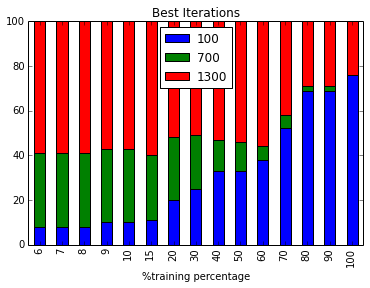

In [53]:
iterations.T.plot(kind='bar', stacked='True', title="Best Iterations")
plt.xlabel("%training percentage")

In [57]:
home = pd.DataFrame(home)

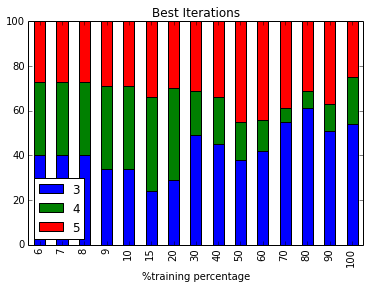

In [58]:
home.T.plot(kind='bar', stacked='True', title="Best Iterations")
plt.xlabel("%training percentage")

In [59]:
season = pd.DataFrame(season)

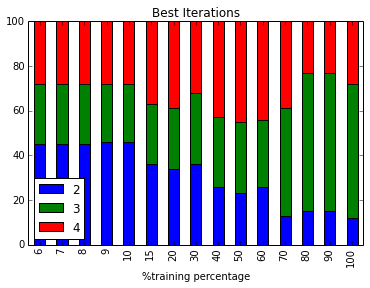

In [60]:
season.T.plot(kind='bar', stacked='True', title="Best Iterations")
plt.xlabel("%training percentage")

In [62]:
lr = pd.DataFrame(lr)

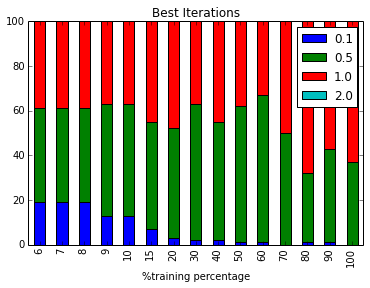

In [63]:
lr.T.plot(kind='bar', stacked='True', title="Best Iterations")
plt.xlabel("%training percentage")